# Работа с файлами и папками

Скрипт может создать большое количество файлов, и вполне закономерно желание поместить их в различные папки. Работать с папками позволяет модуль `os`.

In [1]:
import os

## Путь-подобные объекты

Этот модуль взаимодействует с путь-подобными объектами. **Путь-подобный объект** -- это просто строка, которая содержит имя файла, имя папки, в которой он находится, имя папки, в которой находится эта папка и т.д. Имя файла и папок разделены прямой косой чертой (forward slash) `'/'` (Linux и MacOS) или двойной обратной косой чертой (double backward slash) `'\\'` (Windows). Путь бывает абсолютным, и тогда он начинается с имени диска в Windows и с `'/'`  в Linux, или относительным, и начинается с имени папки.

In [13]:
my_abs_path = 'C:\\Users\\elall\\OneDrive\\Documents\\Informatics\\B06-107\\Spring\\Lab8'
# Это абсолютный путь
my_rel_path = 'Сундук'
# Это относительный путь

Рассмотрим абсолютный путь: на диске `C` лежит папка `Users`, в ней папка `elall`, в ней `OneDrive`, который содержит `Documents`, в которой `Informatics`, в которой `B06-107`, в которой `Spring`, в которой `Lab8`.

Относительный путь: в той же папке, где находится `Lab8.ipynb`, лежит папка `Сундук`.
Проверим существование этих папок:

In [15]:
os.path.exists(my_abs_path), os.path.exists(my_rel_path), os.path.exists('Случайная ерунда')

(True, True, False)

Можно проверить, является ли путь абсолютным:

In [16]:
os.path.isabs(my_abs_path), os.path.isabs(my_rel_path)

(True, False)

Абсолютный путь отображается как абсолютный, относительный - нет.

Также можно проверить, является ли то, к чему приводит путь, папкой или файлом:

In [18]:
looks_like_a_folder = 'Сундук'
looks_like_a_file = 'Lab8.ipynb'
for obj in (looks_like_a_folder, looks_like_a_file):
    print('Is', obj, 'a file?', os.path.isfile(obj))
    print('Is', obj, 'a folder?', os.path.isdir(obj))

Is Сундук a file? False
Is Сундук a folder? True
Is Lab8.ipynb a file? True
Is Lab8.ipynb a folder? False


Можно получить абсолютный путь по относительному:

In [19]:
os.path.abspath(my_rel_path)

'C:\\Users\\elall\\OneDrive\\Documents\\Informatics\\B06-107\\Spring\\Lab8\\Сундук'

И наоборот:

In [20]:
os.path.relpath(my_abs_path, start=my_rel_path)

'..'

Аргумент `start` задаёт начальную папку, от которой отсчитыватеся путь, по умолчанию, это папка, в которой лежит скрипт или ноутбук. Две точки `..` означают спуск на одну папку вниз.

Иногда требуется отделить от пути имя папки или файла, к которому он приводит, папку, в которой он хранится, диск, на котором он находится или его расширение.

In [21]:
print('Найдём имя файла или папки:', os.path.basename(my_abs_path))
print('Найдём путь к папке, где он лежит:', os.path.dirname(my_abs_path))
print('Найдём и то, и другое одной функцией:', os.path.split(my_abs_path))
print('Определим диск, на котором лежит файл:', os.path.splitdrive(my_abs_path))
print('Определим расширение файла:', os.path.splitext(my_abs_path))

Найдём имя файла или папки: Lab8
Найдём путь к папке, где он лежит: C:\Users\elall\OneDrive\Documents\Informatics\B06-107\Spring
Найдём и то, и другое одной функцией: ('C:\\Users\\elall\\OneDrive\\Documents\\Informatics\\B06-107\\Spring', 'Lab8')
Определим диск, на котором лежит файл: ('C:', '\\Users\\elall\\OneDrive\\Documents\\Informatics\\B06-107\\Spring\\Lab8')
Определим расширение файла: ('C:\\Users\\elall\\OneDrive\\Documents\\Informatics\\B06-107\\Spring\\Lab8', '')


Обратите внимание, функции `os.path.splitdrive` и `os.path.splitext` возвращают два значения.

Функция `os.path.join` позволяет объединить имена вложенных папок в один путь, обращая внимание на операционную систему, в отличие от соответствующей функции для строк:

In [23]:
folder_names = ['Сундук', 
               'Заяц',
               'Утка',
               'Яйцо']
os.path.join(*folder_names)

'Сундук\\Заяц\\Утка\\Яйцо'

Обратите внимание, `os.path.join` принимает несколько строк (а не список и не кортеж строк)

## Изменение файлов и папок

Проверим, можно ли работать с файлом:

In [24]:
my_path = 'Lab8.ipynb'
print("Файл существует?", os.access(my_path, os.F_OK))
print("Файл можно открыть на чтение?", os.access(my_path, os.R_OK))
print("Файл можно открыть на запись?", os.access(my_path, os.W_OK))
print("Файл можно запустить?", os.access(my_path, os.X_OK))

Файл существует? True
Файл можно открыть на чтение? True
Файл можно открыть на запись? True
Файл можно запустить? True


F_OK, R_OK, W_OK и X_OK - константы, через которые задаётся, какие именно права мы хотим посмотреть.

Можно посмотреть, что находится в интересующей нас папке:

In [25]:
os.listdir('.') # одной точкой обозначается папка, в которой мы находимся

['.ipynb_checkpoints', 'Lab8.ipynb', 'Сундук']

Можно создать папку:

In [26]:
os.mkdir('My_new_folder')
os.listdir('.')

['.ipynb_checkpoints', 'Lab8.ipynb', 'My_new_folder', 'Сундук']

Можно ли создать папку сразу внутри другой создаваемой папки?

In [27]:
os.mkdir('my\\new\\folder')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'my\\new\\folder'

Можно, если мы воспользуемся функцией `os.makedirs`:

In [31]:
os.makedirs('my\\new\\folder')

In [33]:
for folder in ('.', 'my', 'my\\new'):
    print(os.listdir(folder))

['.ipynb_checkpoints', 'Lab8.ipynb', 'my', 'My_new_folder', 'Сундук']
['new']
['folder']


Удалить файл можно помощью функции os.remove:

In [36]:
with open('unused.file', 'w', encoding='utf8') as f:
    print('Создадим что-нибудь ненужное', file=f)
print(os.listdir())
os.remove('unused.file') #удалим что-то ненужное
print(os.listdir())

['.ipynb_checkpoints', 'Lab8.ipynb', 'my', 'My_new_folder', 'unused.file', 'Сундук']
['.ipynb_checkpoints', 'Lab8.ipynb', 'my', 'My_new_folder', 'Сундук']


Попробуем удалить папку:

In [37]:
os.remove('My_new_folder')

PermissionError: [WinError 5] Access is denied: 'My_new_folder'

Папки удаляются другой функцией:

In [39]:
os.rmdir('My_new_folder')
os.listdir()

['.ipynb_checkpoints', 'Lab8.ipynb', 'my', 'Сундук']

Извести папку, в которой лежит только папка, в которой лежит только пустая папка, можно с помощью removedirs:

In [40]:
os.removedirs('my\\new\\folder')
os.listdir()

['.ipynb_checkpoints', 'Lab8.ipynb', 'Сундук']

Можно переименовать какой-нибудь файл или папку

In [42]:
egg = 'Сундук\\Заяц\\Утка\\Яйцо'
print(os.listdir(egg))
old_name = 'Игла.txt'
new_name = 'Смерть кащеева.txt'
full_old = os.path.join(egg, old_name) # пропишем старое имя с путём
full_new = os.path.join(egg, new_name) # пропишем новое имя с путём
os.rename(full_old, full_new)
os.listdir(egg)

['Игла.txt']


['Смерть кащеева.txt']

## Упражнение 1

Пафнутий редактировал csv-файлы в "Блокноте", увлёкся и не заметил, что они все сохранились с расширением `.txt`, да ещё и в папке со смешными картинками. Напишите скрипт, который сделает csv-файлам их правильное расширение, не тронув при этом картинки. Подтвердите его работоспособоность на файлах, которые вы найдёте в архиве `x.zip`, где x - ваш номер по списку.

In [17]:



folder = 'C:\\Users\\lygun\\Downloads\\B06-107-main\\B06-107-Spring-Lab8\\6'

def pafnutyi_gfuwtc(folder):
    for i in os.listdir(folder):
        if i.endswith('.txt'):
            os.rename(os.path.join(folder, i), os.path.join(folder, i[0:-4]))
        

pafnutyi_gfuwtc(folder)
os.listdir(folder)

['00.csv',
 '01.csv',
 '02.csv',
 '03.csv',
 '04.csv',
 '05.csv',
 '06.csv',
 '07.csv',
 '08.csv',
 '09.csv',
 '10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '15.csv',
 '16.csv',
 '17.csv',
 '18.csv',
 '19.csv',
 '20.csv',
 '21.csv',
 '22.csv',
 '23.csv',
 '24.csv',
 '25.csv',
 '26.csv',
 '27.csv',
 '28.csv',
 '29.csv',
 '30.csv',
 '31.csv',
 '32.csv',
 '33.csv',
 '34.csv',
 '35.csv',
 '36.csv',
 '37.csv',
 '38.csv',
 'food.png']

## Прохождение внутрь папки

С помощью функции os.walk можно увидеть содержимое всех папок, вложенных в переданную в качестве аргумента:

In [13]:
import os
for item in os.walk('Сундук'):
    print(item)

('Сундук', ['Untitled Folder', 'Заяц'], ['Тряпки_какие-то.txt'])
('Сундук\\Untitled Folder', [], [])
('Сундук\\Заяц', ['Утка'], ['Кусок_морковки.txt'])
('Сундук\\Заяц\\Утка', ['Яйцо'], ['Водоросли.txt'])
('Сундук\\Заяц\\Утка\\Яйцо', [], ['Смерть кащеева.txt'])


Функция возвращает набор троек: имя папки, список папок, которые в ней находятся, файлы, которые в неё находятся.

## Упражнение 2

Напишите функцию, которая выводит все пустые папки (с путём) в заданной папке. Проверьте её работоспособность.

In [16]:
import os

def if_empty(folder):
    for item in os.walk(folder):
        if not os.listdir(item[0]):
            print(item[0])
folder = 'Сундук'

if_empty(folder)

Сундук\Untitled Folder
Сундук\Untitled Folder 1
Сундук\Заяц\Утка\Untitled Folder


## Упражнение 3

Для каждого файла из упражнения №1 постройте точечный график (первый столбец - абсциссы, остальные - ординаты различных серий) и сохраните как `png`. Все графики должны оказаться в специально созданной скриптом папке.

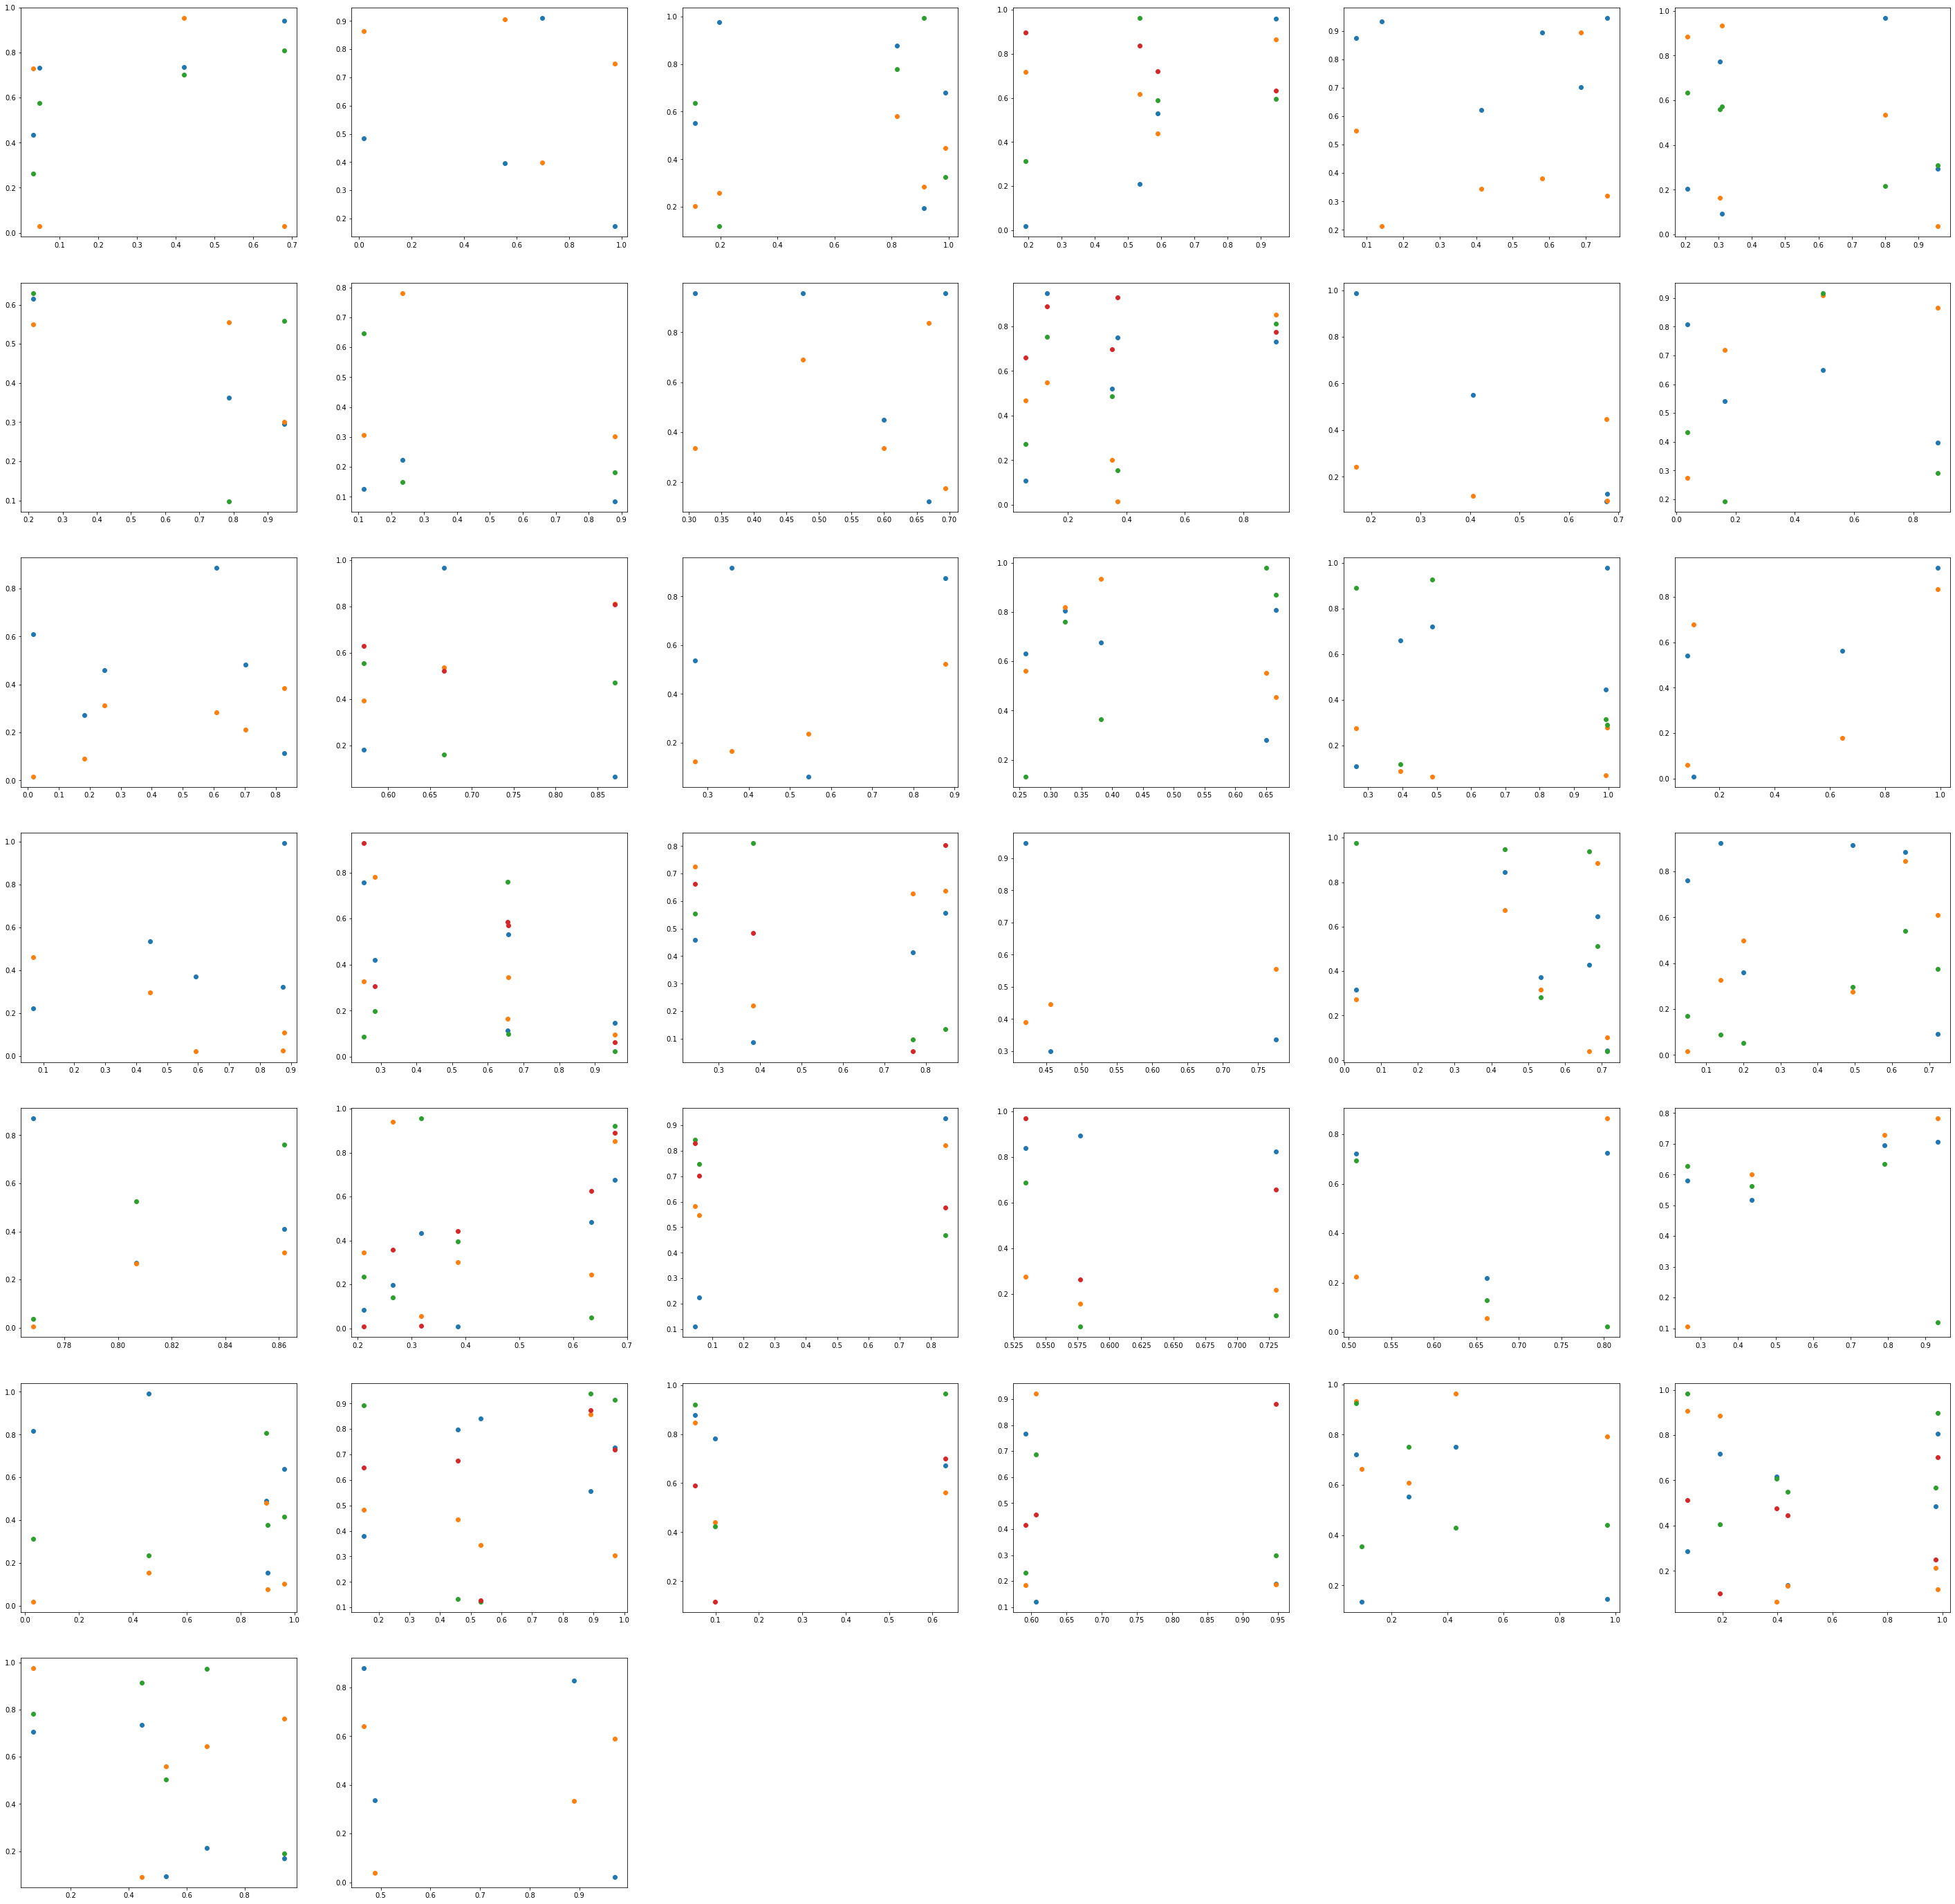

In [118]:
import os
import pandas as pd
import matplotlib.pyplot as plt

names = [(str(i) + 'st') for i in range(38)]
for i in range(len(names)):
    path_to_file = '6\\\\'
    if i < 10:
        path_to_file += '0'
    path_to_file += str(i) + '.csv'
    names[i] = pd.read_csv(path_to_file)
    
        
os.mkdir('Folder_for_plots')

fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(50)
axises = ['ax' + str(j) for j in range(len(names))]  


for i in range(len(names)):
    axises[i] = fig.add_subplot(7, 6, i + 1)
    for j in names[i].columns[1:]:
        axises[i].scatter(names[i][names[i].columns[0]], names[i][j])
fig.savefig('Folder_for_plots\\plots.png')
